# Handwriting Recognition using K-Means

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## 1. Getting Started with the Digits Dataset

In [2]:
# Import datasets from sklearn
from sklearn import datasets

# Load the digits data
digits = datasets.load_digits()

In [9]:
# Go through data description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [10]:
# Inspect the data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [11]:
# Inspect the target values
print(digits.target)

[0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

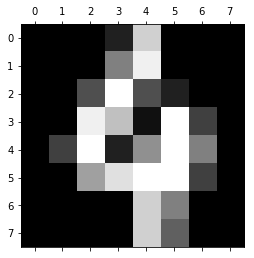

In [15]:
# Visualize the image at index 100
plt.gray()
plt.matshow(digits.images[100])
plt.show()

In [16]:
# Find out the target label at at index 100
print(digits.target[100])

4


## 2. K-Means Clustering:

In [28]:
# k = 10 because there are 10 classes from (1, .., 10)
k = 10

# Build the model that find k clusters
# The random_state will ensure that the model is built in the same way every run
model = KMeans(n_clusters=k, random_state=1314)

# Fit the digits.data to the model
model.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1314, tol=0.0001, verbose=0)

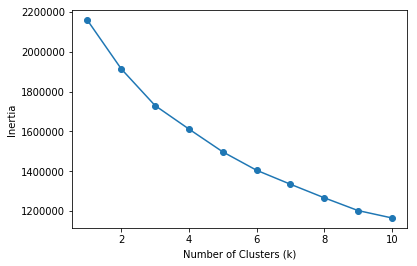

In [29]:
# Confirm the optimal number of clusters useing the "Elbow" method
num_clusters = list(range(1, 11))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters=i)
  model.fit(digits.data)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.show()

## 3. Visualizing after K-Means:

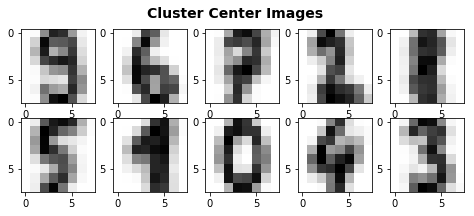

In [31]:
# Visualize all the centroids
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    
plt.show()

- Index 0 looks like 9
- Index 1 looks like 6
- Index 2 looks like 7
- Index 3 looks like 2
- Index 4 looks like 8
- Index 5 looks like 5
- Index 6 looks like 1
- Index 7 looks like 0
- Index 8 looks like 4
- Index 9 looks like 3

## 4. Testing the Model:

In [53]:
# 1234
new_samples_1234 = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,6.47,4.33,0.00,0.00,0.00,0.00,3.17,7.04,6.84,3.58,0.00,0.00,0.00,0.00,2.89,1.81,4.57,3.05,0.00,0.00,0.00,0.00,0.00,0.00,3.73,4.19,0.00,0.00,0.00,0.00,0.00,0.00,3.04,4.56,0.00,0.00,0.00,0.00,0.00,0.00,3.04,4.56,0.00,0.00,0.00,0.00,0.00,0.00,1.90,3.43,0.00,0.00,0.00],
[0.00,0.08,2.20,4.26,4.18,0.00,0.00,0.00,0.00,4.49,6.08,3.66,6.75,1.90,0.00,0.00,0.00,0.30,0.07,0.00,3.95,3.81,0.00,0.00,0.00,0.00,0.00,0.00,4.27,3.73,0.00,0.00,0.00,0.00,0.00,0.48,6.93,1.37,0.00,0.00,0.00,0.00,0.45,5.52,5.68,1.52,0.83,0.00,0.00,0.00,2.35,6.09,6.09,6.09,4.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,1.82,2.28,2.20,0.52,0.00,0.00,0.00,0.00,5.10,5.33,5.93,6.91,1.44,0.00,0.00,0.00,0.00,0.00,0.00,4.87,3.81,0.00,0.00,0.00,0.00,0.97,4.72,6.70,1.29,0.00,0.00,0.00,0.00,4.78,7.06,6.53,1.06,0.00,0.00,0.00,0.00,0.00,0.08,4.77,3.65,0.00,0.00,0.00,0.00,1.44,4.34,7.13,2.20,0.00,0.00,0.00,3.50,7.13,4.03,0.98,0.00,0.00,0.00],
[0.00,0.00,0.23,1.36,0.00,0.00,0.00,0.00,0.00,0.00,3.43,4.80,0.08,0.30,0.00,0.00,0.00,0.00,6.65,1.88,2.74,4.49,0.00,0.00,0.00,0.96,6.93,0.00,3.20,4.55,0.00,0.00,0.00,1.52,6.09,0.00,3.81,3.81,0.00,0.00,0.00,0.90,7.33,5.71,6.48,6.47,5.93,3.42,0.00,0.00,0.76,2.13,4.95,4.95,1.97,0.68,0.00,0.00,0.00,0.00,2.51,2.82,0.00,0.00]
])

# Predict the new labels
new_labels = model.predict(new_samples_1234)
print(new_labels)

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(9, end='')
  elif new_labels[i] == 1:
    print(6, end='')
  elif new_labels[i] == 2:
    print(7, end='')
  elif new_labels[i] == 3:
    print(2, end='')
  elif new_labels[i] == 4:
    print(8, end='')
  elif new_labels[i] == 5:
    print(5, end='')
  elif new_labels[i] == 6:
    print(1, end='')
  elif new_labels[i] == 7:
    print(0, end='')
  elif new_labels[i] == 8:
    print(4, end='')
  elif new_labels[i] == 9:
    print(3, end='')

[5 2 2 8]
5774